#### Exercise 1
create a class called `Point` that takes two parameters `x` and `y` and stores them as attributes. Then create a method called `distance` that takes another `Point` object and calculates the distance between the two points.

Create an appropriate `__str__` method for the class.

In [17]:
import math
class Point:
    def __init__(self,x,y):
        self.x=x
        self.y=y
    def distance(self, another):
        return math.sqrt((self.x - another.x) ** 2 + (self.y - another.y) ** 2)

    def __str__(self):
        return f"Point({self.x} , {self.y})"
    

point1=Point(1,2)
point2=Point(4,6)

print (f"the Differnece distance between {point1} and {point2} is {Point.distance(point1,point2)}")
    

the Differnece distance between Point(1 , 2) and Point(4 , 6) is 5.0


#### Exercise 2
- create a class called `Line` that takes two parameters `point1` and `point2` and stores them as attributes. Then create a method called `length` that calculates the length of the line.
- the `Line` class should also have a method called `slope` that calculates the slope of the line.
- create a method called `point_on_line` that takes a `Point` object and returns `True` if the point is on the line and `False` otherwise.

Create an appropriate `__str__` method for the class.

In [18]:
from math import sqrt
# lets create 2 classes one for points and another for line as needed


class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __str__(self):
        return f"Point({self.x}, {self.y})"
		

class Line:
    def __init__(self, point1, point2):
        self.point1 = point1
        self.point2 = point2

    def length(self):
        return sqrt((self.point1.x - self.point2.x) ** 2 + (self.point1.y - self.point2.y) ** 2)

    def slope(self):
        try:
            return (self.point2.y - self.point1.y) / (self.point2.x - self.point1.x)
        except ZeroDivisionError:
            return float('infinite')  # Slope is infinite for vertical linessssss :)

    def point_on_line(self, point3):
        # For a point to be on the line, the slope between point1 and point3
        # should be the same as the slope between point1 and point2.
        # We use the cross product to avoid division by zero issues.
        dy1 = point3.y - self.point1.y
        dx1 = point3.x - self.point1.x
        dy2 = self.point2.y - self.point1.y
        dx2 = self.point2.x - self.point1.x
        return dy1 * dx2 == dy2 * dx1

    def __str__(self):
        return f"Line({self.point1}, {self.point2})"

# Example usage:
point1 = Point(1, 1)
point2 = Point(5, 4)
line = Line(point1, point2)

print(line)  
print(f"Length of the line: {line.length()}")  
print(f"Slope of the line: {line.slope()}")    

# is the point on the line ? 
point3 = Point(3,2.5)
print(f"Is Point on the line? {line.point_on_line(point3)}")  



Line(Point(1, 1), Point(5, 4))
Length of the line: 5.0
Slope of the line: 0.75
Is Point on the line? True


#### Exercise 3
- create a class called `Shape` that takes a list of `Lines` and stores them as an attribute. Then create a method called `perimeter` that calculates the perimeter of the shape.
- the `Shape` class should have a method called `draw` that draws the shape using `matplotlib`. use the function `draw_lines` below to draw the lines.
- create a method called `point_on_perimeter` that takes a `Point` object and returns `True` if the point is on the perimeter of the shape and `False` otherwise.

Create an appropriate `__str__` method for the class.

Shape with 3 sides
Perimeter of the shape: 12.0


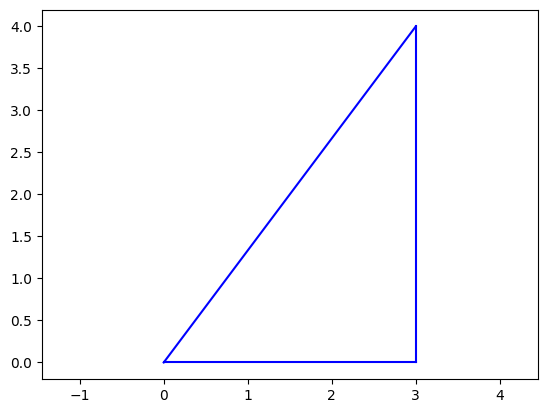

Is Point(3, 2) on the perimeter? True
Is Point(-1, -2) on the perimeter? False


In [19]:
import matplotlib.pyplot as plt

class Shape:
    def __init__(self, lines):
        self.lines = lines

    def perimeter(self):
        return sum(line.length() for line in self.lines)

    def draw(self, color='blue'):
        draw_lines(self.lines, color)  #global

    def point_on_perimeter(self, point):
        return any(line.point_on_line(point) for line in self.lines)

    def __str__(self):
        return f"Shape with {len(self.lines)} sides"

def draw_lines(lines, color='blue'):
    for line in lines:
        plt.plot([line.point1.x, line.point2.x], [line.point1.y, line.point2.y], color=color)
    plt.axis('equal')
    plt.show()

# Assuming the Point and Line classes are defined as before:

class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __str__(self):
        return f"Point({self.x}, {self.y})"

class Line:
    def __init__(self, point1, point2):
        self.point1 = point1
        self.point2 = point2

    def length(self):
        return sqrt((self.point1.x - self.point2.x) ** 2 + (self.point1.y - self.point2.y) ** 2)

    def point_on_line(self, point):
        # Check if the point is on the line using a cross product approach
        dy1 = point.y - self.point1.y
        dx1 = point.x - self.point1.x
        dy2 = self.point2.y - self.point1.y
        dx2 = self.point2.x - self.point1.x
        return dy1 * dx2 == dy2 * dx1

    def __str__(self):
        return f"Line from {self.point1} to {self.point2}"

# Examples tests ... >>>>

p1 = Point(0, 0)
p2 = Point(3, 0)
p3 = Point(3, 4)
line1 = Line(p1, p2)
line2 = Line(p2, p3)
line3 = Line(p3, p1)

triangle = Shape([line1, line2, line3])
print(triangle)  
print(f"Perimeter of the shape: {triangle.perimeter()}")  
triangle.draw()  # This will draw the triangle

# Check if a point is on the perimeter of the shape
test_point = Point(3, 2)
print(f"Is {test_point} on the perimeter? {triangle.point_on_perimeter(test_point)}")  

test_point = Point(-1,-2)
print(f"Is {test_point} on the perimeter? {triangle.point_on_perimeter(test_point)}") 


create the following classes:
- `Rectangle` that inherits from `Shape` and takes three parameters `width` and `height` and a Point object `center`. The lines of the rectangle should be calculated using the `width`, `height` and `center` parameters. Then create a method called `area` that calculates the area of the rectangle.
- `Square` that inherits from `Rectangle` and takes two parameter `side` and `center` and stores it as an attribute.
- `Circle` that inherits from `Shape` and takes 3 parameters `radius` and `center` and an optional `num_sides` with a default value of 20. The lines of the circle should be calculated using the `radius`, `center` and `num_sides` parameters. Then create a method called `area` that calculates the area of the circle.
- for the `Circle` class, override the `perimeter` and `point_on_perimeter` methods to work with circles (it should find if point on perimeter in the logical sense rather than the visual representatiobn that uses lines).

Create an appropriate `__str__` method for each one of the classes.

Rectangle with width 4 and height 6
Area of rectangle: 24
Square with side 4
Area of square: 16
Circle with radius 5
Area of circle: 78.53981633974483
Perimeter (circumference) of circle: 31.41592653589793
Is Point(2, 0) on the perimeter of the square? True
Is Point(5, 0) on the perimeter of the circle? True


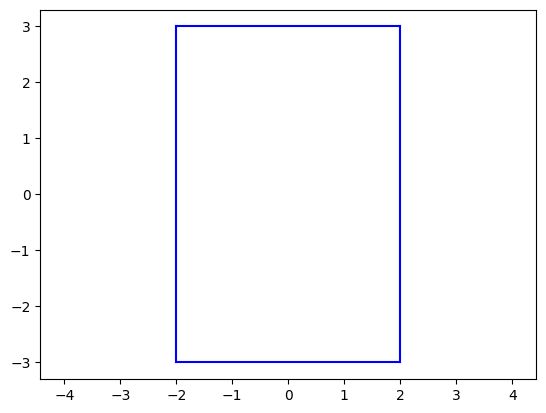

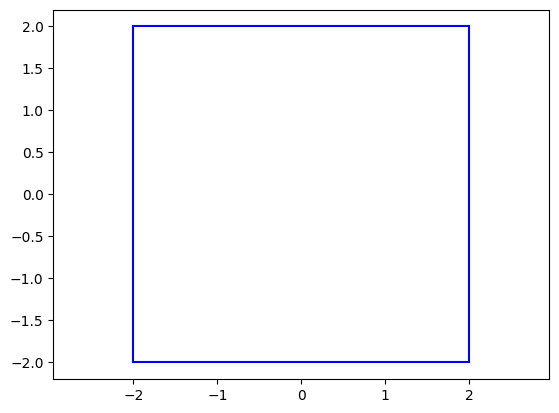

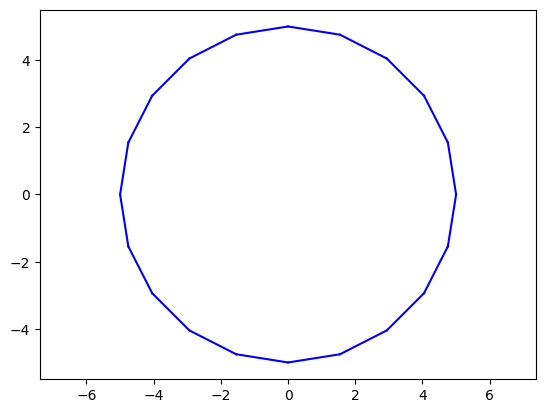

In [20]:
import matplotlib.pyplot as plt
from math import sqrt, pi, cos, sin

#Assume these already created as above exercise
class Shape:
    def __init__(self, lines):
        self.lines = lines

    def perimeter(self):
        return sum(line.length() for line in self.lines)

    def draw(self, color='blue'):
        draw_lines(self.lines, color)

    def point_on_perimeter(self, point):
        return any(line.point_on_line(point) for line in self.lines)

    def __str__(self):
        return f"Shape with {len(self.lines)} sides"

def draw_lines(lines, color='blue'):
    for line in lines:
        plt.plot([line.point1.x, line.point2.x], [line.point1.y, line.point2.y], color=color)
    plt.axis('equal')
    plt.show()

class Rectangle(Shape):
    def __init__(self, width, height, center):
        self.width = width
        self.height = height
        self.center = center
        half_width = width / 2
        half_height = height / 2
        lower_left = Point(center.x - half_width, center.y - half_height)
        lower_right = Point(center.x + half_width, center.y - half_height)
        upper_left = Point(center.x - half_width, center.y + half_height)
        upper_right = Point(center.x + half_width, center.y + half_height)
        lines = [Line(lower_left, lower_right), Line(lower_right, upper_right),
                 Line(upper_right, upper_left), Line(upper_left, lower_left)]
        super().__init__(lines)

    def area(self):
        return self.width * self.height

    def __str__(self):
        return f"Rectangle with width {self.width} and height {self.height}"

class Square(Rectangle):
    def __init__(self, side, center):
        super().__init__(side, side, center)
        self.side = side

    def __str__(self):
        return f"Square with side {self.side}"

class Circle(Shape):
    def __init__(self, radius, center, num_sides=20):
        self.radius = radius
        self.center = center
        self.num_sides = num_sides
        lines = self._create_polygon_approximation()
        super().__init__(lines)

    def _create_polygon_approximation(self):
        angle = 2 * pi / self.num_sides
        points = [Point(self.center.x + self.radius * cos(angle * i),
                        self.center.y + self.radius * sin(angle * i)) for i in range(self.num_sides + 1)]
        lines = [Line(points[i], points[i + 1]) for i in range(self.num_sides)]
        return lines

    def area(self):
        return pi * self.radius ** 2

    def perimeter(self):
        return 2 * pi * self.radius

    def point_on_perimeter(self, point):
        # Check if the distance from the center to the point is equal to the radius
        return abs(sqrt((point.x - self.center.x) ** 2 + (point.y - self.center.y) ** 2) - self.radius) < 1e-6

    def __str__(self):
        return f"Circle with radius {self.radius}"

# Example
center_point = Point(0, 0)
rect = Rectangle(4, 6, center_point)
print(rect)  
print(f"Area of rectangle: {rect.area()}") 

sq = Square(4, center_point)
print(sq) 
print(f"Area of square: {sq.area()}") 

circle = Circle(5, center_point)
print(circle)  
print(f"Area of circle: {circle.area()}")

print(f"Perimeter (circumference) of circle: {circle.perimeter()}")  

# Check if a point is on the perimeter of the square
test_point_square = Point(2, 0)
print(f"Is {test_point_square} on the perimeter of the square? {sq.point_on_perimeter(test_point_square)}")  

# Check if a point is on the perimeter of the circle
test_point_circle = Point(5, 0)
print(f"Is {test_point_circle} on the perimeter of the circle? {circle.point_on_perimeter(test_point_circle)}")

# Drawing the shapes
rect.draw()  # draw the rectangle 
sq.draw()    # draw the square 
circle.draw() #draw circle

#### Exercise 4 ##  SOLVED BELOW ^^^
Create a program that simulates a simple employee management system. The program should allow the user to perform the following tasks:
- add a new employee either a Manager or a Developer to the company.
- display the list of employees in the company, along with their details.
- calculate the total salary of all employees in the company.

Create the following classes:
- `Employee` class that takes three parameters `name`, `age` and `salary` and stores them as attributes. 
- `Manager` class that inherits from `Employee` and takes an additional parameter `department` and stores it as an attribute.
- `Developer` class that inherits from `Employee` and takes an additional parameter `programming_language` and stores it as an attribute.

Create a class called `Company` with the following methods:
- `add_employee` that takes an `Employee` object and adds it to the list of employees.
- `display_employees` that displays the list of employees in the company.
- `calculate_total_salary` that calculates the total salary of all employees in the company.

Use user input to allow the user to perform the above tasks.

##### Example Output
```console
Welcome to Estarta Solutions Employee Management System

What task would you like to perform?
1. Add a new employee
2. Display employees
3. Calculate total salary
4. Exit

Enter your choice: 1

Enter employee type (Manager/Developer): Manager
Enter employee name: Ali
Enter employee age: 35
Enter employee salary: 5000
Enter employee department: IT

Employee added successfully!

What task would you like to perform?
1. Add a new employee
2. Display employees
3. Calculate total salary
4. Exit

Enter your choice: 1

Enter employee type (Manager/Developer): Developer
Enter employee name: Sara
Enter employee age: 28
Enter employee salary: 4000
Enter employee programming language: Python

Employee added successfully!

What task would you like to perform?
1. Add a new employee
2. Display employees
3. Calculate total salary
4. Exit

Enter your choice: 2

Ali, a 35 year old Manager in the IT department with a salary of 5000
Sara, a 28 year old Developer in Python with a salary of 4000

What task would you like to perform?
1. Add a new employee
2. Display employees
3. Calculate total salary
4. Exit

Enter your choice: 3

Total salary of all employees is 9000

What task would you like to perform?
1. Add a new employee
2. Display employees
3. Calculate total salary
4. Exit

Enter your choice: 4

Thank you for using Estarta Solutions Employee Management System.
Goodbye!
```

In [21]:
# SOlution for ex4............ solved in seperate file Estarta_mgmt_sys.py



